In [3]:
#part 1
#1.import data and libraries

In [4]:
%tensorflow_version 2.x

In [5]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc
import matplotlib.pyplot as plt
from tensorflow.keras import optimizers

In [6]:
from google.colab import drive

In [7]:
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [8]:
projectpath='/content/drive/MyDrive/greatlearningdata/'

In [9]:
dataset_file = projectpath + 'Part- 1 - Signal.csv'

In [10]:
data = pd.read_csv(dataset_file)

In [11]:
data.head() #prints the first five elements of the dataset

Parameter 1  Parameter 2  ...  Parameter 11  Signal_Strength
0          7.4         0.70  ...           9.4                5
1          7.8         0.88  ...           9.8                5
2          7.8         0.76  ...           9.8                5
3         11.2         0.28  ...           9.8                6
4          7.4         0.70  ...           9.4                5

[5 rows x 12 columns]

In [12]:
#2. data analysis and visualization
#shape of the data
data.shape

(1599, 12)

There are 1599 rows and 12 columns in data

In [13]:
#Size of the data
size=data.size
print("Size of the data:",size)

Size of the data: 19188


In [14]:
# Data type of each attribute 
data.info() #it gives information about the data and data types of each attribute

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1599 non-null   float64
 1   Parameter 2      1599 non-null   float64
 2   Parameter 3      1599 non-null   float64
 3   Parameter 4      1599 non-null   float64
 4   Parameter 5      1599 non-null   float64
 5   Parameter 6      1599 non-null   float64
 6   Parameter 7      1599 non-null   float64
 7   Parameter 8      1599 non-null   float64
 8   Parameter 9      1599 non-null   float64
 9   Parameter 10     1599 non-null   float64
 10  Parameter 11     1599 non-null   float64
 11  Signal_Strength  1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


From the above it is clearly evident that

1.All the parameters are floating point and the signal strength is an integer.

2.Apart from Signal Strength rest all features are floating point.

In [110]:
#2. Data analysis and visualization

In [15]:
# Checking for missing values
null_no = data.isnull().sum()  # This prints the columns with the number of null values they have
print (null_no)

Parameter 1        0
Parameter 2        0
Parameter 3        0
Parameter 4        0
Parameter 5        0
Parameter 6        0
Parameter 7        0
Parameter 8        0
Parameter 9        0
Parameter 10       0
Parameter 11       0
Signal_Strength    0
dtype: int64


From the above, it is evident that there are no null values in the data.

In [16]:
# 5 point summary of numerical attributes
data.describe()

Parameter 1  Parameter 2  ...  Parameter 11  Signal_Strength
count  1599.000000  1599.000000  ...   1599.000000      1599.000000
mean      8.319637     0.527821  ...     10.422983         5.636023
std       1.741096     0.179060  ...      1.065668         0.807569
min       4.600000     0.120000  ...      8.400000         3.000000
25%       7.100000     0.390000  ...      9.500000         5.000000
50%       7.900000     0.520000  ...     10.200000         6.000000
75%       9.200000     0.640000  ...     11.100000         6.000000
max      15.900000     1.580000  ...     14.900000         8.000000

[8 rows x 12 columns]

Looking at the 11 parameters it is clearly evident that

1.Parameter 3 ranges between 0 and 1.

2.Maximum value of Parameter 5 is 0.6

3.Parameter 8 has a very low range between 0.9 and 1.004

4.Standard deviation is lowest for Parameter 8, it is 0.001887

5.'Signal_Strength' has classes as - 3.5, 4.0,5.0, 6.0, 7.0 and 7.5

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


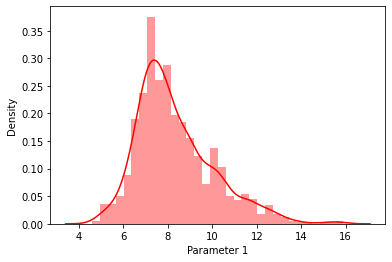

Distribution of  Parameter 1
Mean is: 8.319637273295838
Median is: 7.9
Mode is: 0    7.2
dtype: float64
Standard deviation is: 1.7410963181277006
Skewness is: 0.9827514413284587
Maximum is: 15.9
Minimum is: 4.6


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


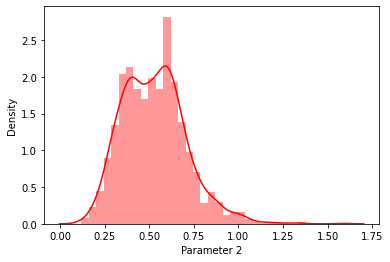

Distribution of  Parameter 2
Mean is: 0.5278205128205131
Median is: 0.52
Mode is: 0    0.6
dtype: float64
Standard deviation is: 0.17905970415353498
Skewness is: 0.6715925723840199
Maximum is: 1.58
Minimum is: 0.12


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


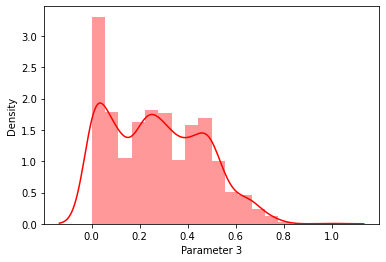

Distribution of  Parameter 3
Mean is: 0.2709756097560964
Median is: 0.26
Mode is: 0    0.0
dtype: float64
Standard deviation is: 0.19480113740531785
Skewness is: 0.3183372952546368
Maximum is: 1.0
Minimum is: 0.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


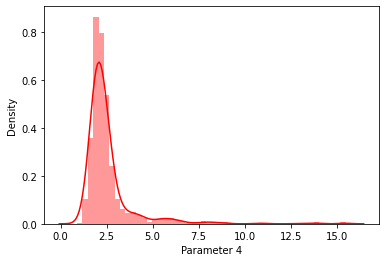

Distribution of  Parameter 4
Mean is: 2.5388055034396517
Median is: 2.2
Mode is: 0    2.0
dtype: float64
Standard deviation is: 1.4099280595072805
Skewness is: 4.54065542590319
Maximum is: 15.5
Minimum is: 0.9


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


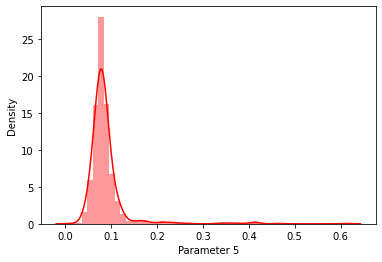

Distribution of  Parameter 5
Mean is: 0.08746654158849257
Median is: 0.079
Mode is: 0    0.08
dtype: float64
Standard deviation is: 0.047065302010090154
Skewness is: 5.680346571971722
Maximum is: 0.611
Minimum is: 0.012


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


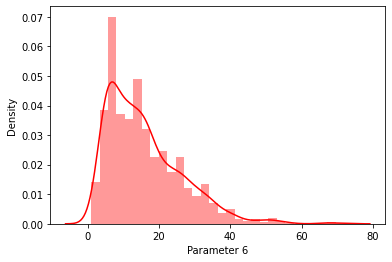

Distribution of  Parameter 6
Mean is: 15.874921826141339
Median is: 14.0
Mode is: 0    6.0
dtype: float64
Standard deviation is: 10.46015696980973
Skewness is: 1.250567293314441
Maximum is: 72.0
Minimum is: 1.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


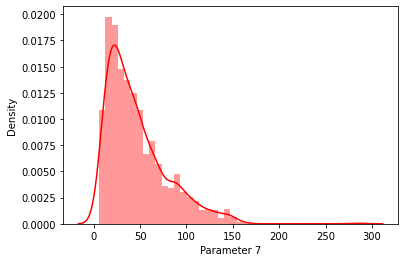

Distribution of  Parameter 7
Mean is: 46.46779237023139
Median is: 38.0
Mode is: 0    28.0
dtype: float64
Standard deviation is: 32.89532447829901
Skewness is: 1.515531257594554
Maximum is: 289.0
Minimum is: 6.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


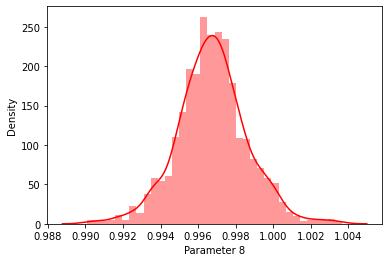

Distribution of  Parameter 8
Mean is: 0.9967466791744833
Median is: 0.99675
Mode is: 0    0.9972
dtype: float64
Standard deviation is: 0.0018873339538425563
Skewness is: 0.07128766294945525
Maximum is: 1.00369
Minimum is: 0.9900700000000001


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


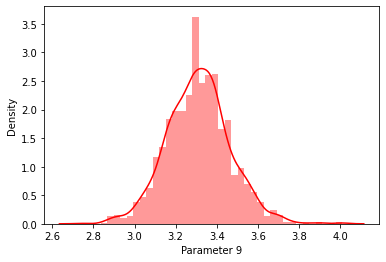

Distribution of  Parameter 9
Mean is: 3.311113195747343
Median is: 3.31
Mode is: 0    3.3
dtype: float64
Standard deviation is: 0.15438646490354266
Skewness is: 0.19368349811284427
Maximum is: 4.01
Minimum is: 2.74


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


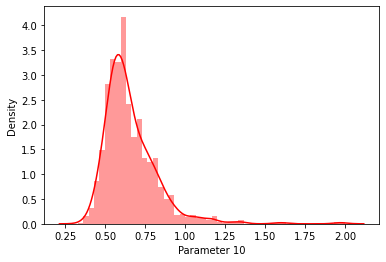

Distribution of  Parameter 10
Mean is: 0.6581488430268921
Median is: 0.62
Mode is: 0    0.6
dtype: float64
Standard deviation is: 0.16950697959010977
Skewness is: 2.4286723536602945
Maximum is: 2.0
Minimum is: 0.33


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


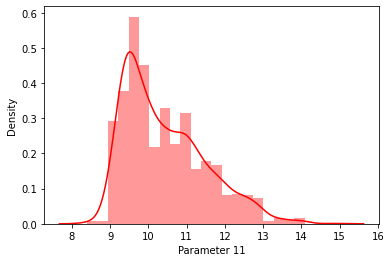

Distribution of  Parameter 11
Mean is: 10.422983114446502
Median is: 10.2
Mode is: 0    9.5
dtype: float64
Standard deviation is: 1.0656675818563965
Skewness is: 0.8608288069184189
Maximum is: 14.9
Minimum is: 8.4


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


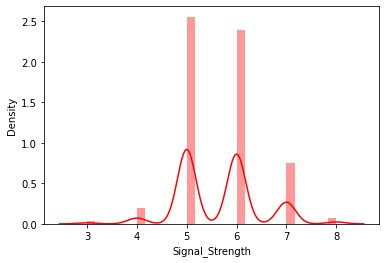

Distribution of  Signal_Strength
Mean is: 5.6360225140712945
Median is: 6.0
Mode is: 0    5
dtype: int64
Standard deviation is: 0.8075694397347023
Skewness is: 0.21780157547366327
Maximum is: 8
Minimum is: 3


In [17]:
# studying the distribution of continuous attributes
import seaborn as sns
cols = list(data)
for i in np.arange(len(cols)):
    sns.distplot(data[cols[i]], color='red')
    plt.show()
    print('Distribution of ',cols[i])
    print('Mean is:',data[cols[i]].mean())
    print('Median is:',data[cols[i]].median())
    print('Mode is:',data[cols[i]].mode())
    print('Standard deviation is:',data[cols[i]].std())
    print('Skewness is:',data[cols[i]].skew())
    print('Maximum is:',data[cols[i]].max())
    print('Minimum is:',data[cols[i]].min())

From the above it is clearly evident that-

1.Mean, median and mode are almost similar or too close to each other except Parameter 7

2.All of them are positively skewed.

3.Standard deviation is maximum for the Parameter7

In [18]:
#statistical analysis

In [19]:
#correlation
data.corr()  #it determines the relation between the attributes of the dataset


Parameter 1  Parameter 2  ...  Parameter 11  Signal_Strength
Parameter 1         1.000000    -0.256131  ...     -0.061668         0.124052
Parameter 2        -0.256131     1.000000  ...     -0.202288        -0.390558
Parameter 3         0.671703    -0.552496  ...      0.109903         0.226373
Parameter 4         0.114777     0.001918  ...      0.042075         0.013732
Parameter 5         0.093705     0.061298  ...     -0.221141        -0.128907
Parameter 6        -0.153794    -0.010504  ...     -0.069408        -0.050656
Parameter 7        -0.113181     0.076470  ...     -0.205654        -0.185100
Parameter 8         0.668047     0.022026  ...     -0.496180        -0.174919
Parameter 9        -0.682978     0.234937  ...      0.205633        -0.057731
Parameter 10        0.183006    -0.260987  ...      0.093595         0.251397
Parameter 11       -0.061668    -0.202288  ...      1.000000         0.476166
Signal_Strength     0.124052    -0.390558  ...      0.476166         1.000000

[12 rows x 12 columns]

In [20]:
#covariance
data.cov()

Parameter 1  Parameter 2  ...  Parameter 11  Signal_Strength
Parameter 1         3.031416    -0.079851  ...     -0.114421         0.174424
Parameter 2        -0.079851     0.032062  ...     -0.038600        -0.056476
Parameter 3         0.227820    -0.019272  ...      0.022815         0.035612
Parameter 4         0.281756     0.000484  ...      0.063219         0.015635
Parameter 5         0.007679     0.000517  ...     -0.011092        -0.004900
Parameter 6        -2.800921    -0.019674  ...     -0.773698        -0.427907
Parameter 7        -6.482346     0.450426  ...     -7.209298        -4.917237
Parameter 8         0.002195     0.000007  ...     -0.000998        -0.000267
Parameter 9        -0.183586     0.006495  ...      0.033832        -0.007198
Parameter 10        0.054010    -0.007921  ...      0.016907         0.034413
Parameter 11       -0.114421    -0.038600  ...      1.135647         0.409789
Signal_Strength     0.174424    -0.056476  ...      0.409789         0.652168

[12 rows x 12 columns]

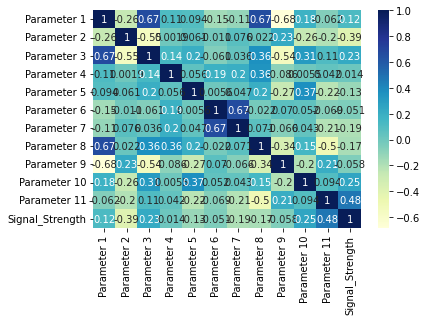

In [21]:
#heat map for correlation

dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
import matplotlib.pyplot as mp
mp.show()

In [22]:
#Range
print('Range of data:',data.max()-data.min())

Range of data: Parameter 1         11.30000
Parameter 2          1.46000
Parameter 3          1.00000
Parameter 4         14.60000
Parameter 5          0.59900
Parameter 6         71.00000
Parameter 7        283.00000
Parameter 8          0.01362
Parameter 9          1.27000
Parameter 10         1.67000
Parameter 11         6.50000
Signal_Strength      5.00000
dtype: float64


In [23]:
#Variance
print('variance:',data.var())

variance: Parameter 1           3.031416
Parameter 2           0.032062
Parameter 3           0.037947
Parameter 4           1.987897
Parameter 5           0.002215
Parameter 6         109.414884
Parameter 7        1082.102373
Parameter 8           0.000004
Parameter 9           0.023835
Parameter 10          0.028733
Parameter 11          1.135647
Signal_Strength       0.652168
dtype: float64


In [24]:
#standard deviation
print('std:',data.std())

std: Parameter 1         1.741096
Parameter 2         0.179060
Parameter 3         0.194801
Parameter 4         1.409928
Parameter 5         0.047065
Parameter 6        10.460157
Parameter 7        32.895324
Parameter 8         0.001887
Parameter 9         0.154386
Parameter 10        0.169507
Parameter 11        1.065668
Signal_Strength     0.807569
dtype: float64


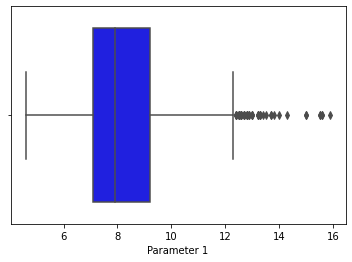

Boxplot of  Parameter 1
Q1 is :  7.1
Q2 is :  7.9
Q3 is :  9.2
IQR is: 2.0999999999999996
Lower Whisker, Upper Whisker :  3.95 , 12.349999999999998
Out of  1599  rows in data, number of outliers are: 49


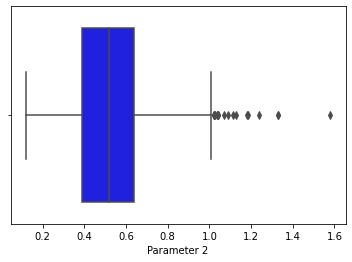

Boxplot of  Parameter 2
Q1 is :  0.39
Q2 is :  0.52
Q3 is :  0.64
IQR is: 0.25
Lower Whisker, Upper Whisker :  0.015000000000000013 , 1.0150000000000001
Out of  1599  rows in data, number of outliers are: 19


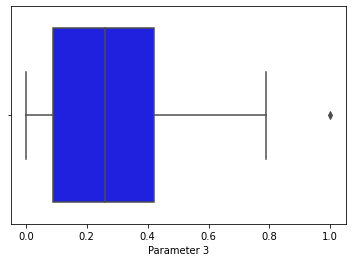

Boxplot of  Parameter 3
Q1 is :  0.09
Q2 is :  0.26
Q3 is :  0.42
IQR is: 0.32999999999999996
Lower Whisker, Upper Whisker :  -0.4049999999999999 , 0.9149999999999999
Out of  1599  rows in data, number of outliers are: 1


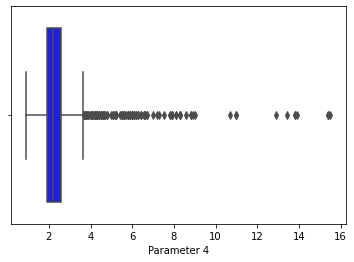

Boxplot of  Parameter 4
Q1 is :  1.9
Q2 is :  2.2
Q3 is :  2.6
IQR is: 0.7000000000000002
Lower Whisker, Upper Whisker :  0.8499999999999996 , 3.6500000000000004
Out of  1599  rows in data, number of outliers are: 155


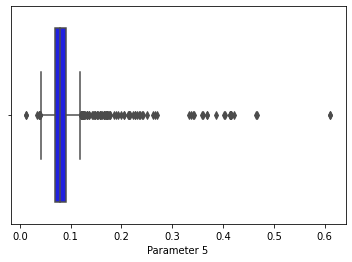

Boxplot of  Parameter 5
Q1 is :  0.07
Q2 is :  0.079
Q3 is :  0.09
IQR is: 0.01999999999999999
Lower Whisker, Upper Whisker :  0.04000000000000002 , 0.11999999999999998
Out of  1599  rows in data, number of outliers are: 112


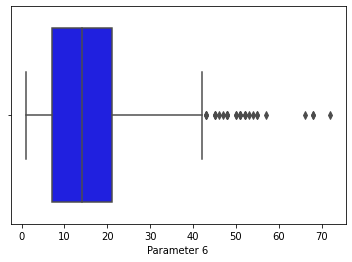

Boxplot of  Parameter 6
Q1 is :  7.0
Q2 is :  14.0
Q3 is :  21.0
IQR is: 14.0
Lower Whisker, Upper Whisker :  -14.0 , 42.0
Out of  1599  rows in data, number of outliers are: 30


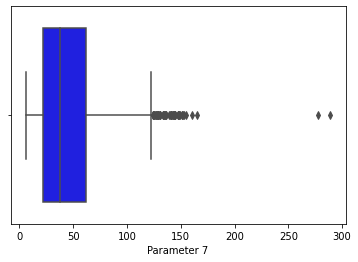

Boxplot of  Parameter 7
Q1 is :  22.0
Q2 is :  38.0
Q3 is :  62.0
IQR is: 40.0
Lower Whisker, Upper Whisker :  -38.0 , 122.0
Out of  1599  rows in data, number of outliers are: 55


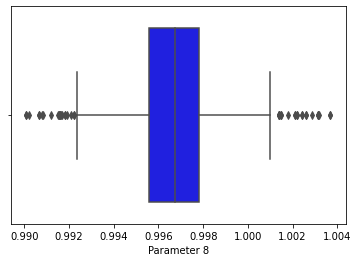

Boxplot of  Parameter 8
Q1 is :  0.9956
Q2 is :  0.99675
Q3 is :  0.9978349999999999
IQR is: 0.002234999999999876
Lower Whisker, Upper Whisker :  0.9922475000000002 , 1.0011874999999997
Out of  1599  rows in data, number of outliers are: 45


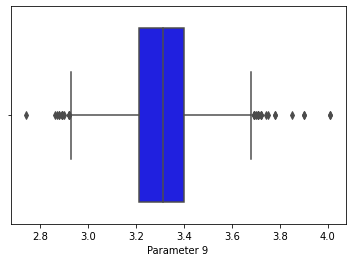

Boxplot of  Parameter 9
Q1 is :  3.21
Q2 is :  3.31
Q3 is :  3.4
IQR is: 0.18999999999999995
Lower Whisker, Upper Whisker :  2.925 , 3.6849999999999996
Out of  1599  rows in data, number of outliers are: 35


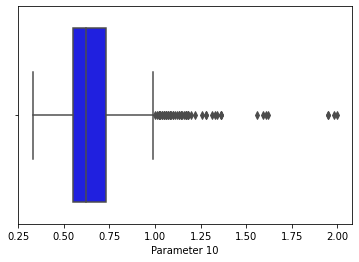

Boxplot of  Parameter 10
Q1 is :  0.55
Q2 is :  0.62
Q3 is :  0.73
IQR is: 0.17999999999999994
Lower Whisker, Upper Whisker :  0.28000000000000014 , 0.9999999999999999
Out of  1599  rows in data, number of outliers are: 59


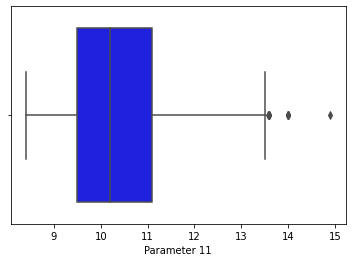

Boxplot of  Parameter 11
Q1 is :  9.5
Q2 is :  10.2
Q3 is :  11.1
IQR is: 1.5999999999999996
Lower Whisker, Upper Whisker :  7.1000000000000005 , 13.5
Out of  1599  rows in data, number of outliers are: 13


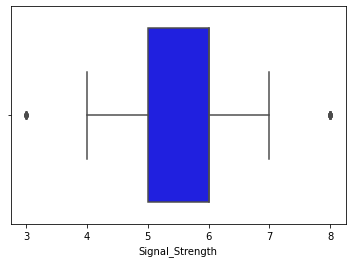

Boxplot of  Signal_Strength
Q1 is :  5.0
Q2 is :  6.0
Q3 is :  6.0
IQR is: 1.0
Lower Whisker, Upper Whisker :  3.5 , 7.5
Out of  1599  rows in data, number of outliers are: 28


In [25]:
#Checking the presence of outliers
l = len(data)
col = list(data.columns)
for i in np.arange(len(col)):
    sns.boxplot(x= data[col[i]], color='blue')
    plt.show()
    print('Boxplot of ',col[i])
    #calculating the outiers in attribute 
    Q1 = data[col[i]].quantile(0.25)  #25%
    Q2 = data[col[i]].quantile(0.50)  #50%- median
    Q3 = data[col[i]].quantile(0.75)  #75%
    IQR = Q3 - Q1  #Interquartile range
    L_W = (Q1 - 1.5 *IQR)  #Lowerwhisker
    U_W = (Q3 + 1.5 *IQR)  #Upper whisker 
    print('Q1 is : ',Q1)
    print('Q2 is : ',Q2)
    print('Q3 is : ',Q3)
    print('IQR is:',IQR)
    print('Lower Whisker, Upper Whisker : ',L_W,',',U_W)
    bools = (data[col[i]] < (Q1 - 1.5 *IQR)) |(data[col[i]] > (Q3 + 1.5 * IQR))
    print('Out of ',l,' rows in data, number of outliers are:',bools.sum())   #calculating the number of outliers

From the above, it is clearly evident that the Parameter 4 has the highest number of outliers i.e 155.

In [26]:
#  function to remove outliers
def detect_outliers(data,operation):
    cols=[]
    IQR_list=[]
    lb_list=[] #lower boundary list
    ub_list=[] #upper boundary list
    outliers_count=[]
    for col in data.columns:
        if((data[col].dtype =='int64' or data[col].dtype =='float64') and (col != 'HR')):
            IQR = data[col].quantile(0.75) - data[col].quantile(0.25)
            lb = data[col].quantile(0.25) - (1.5 * IQR) #lower boundary
            ub= data[col].quantile(0.75) + (1.5 * IQR)  #upper boundary
            up_cnt = data[data[col]>ub][col].shape[0]
            lw_cnt = data[data[col]<lb][col].shape[0]
            if(up_cnt+lw_cnt) > 0:
                cols.append(col)
                IQR_list.append(IQR)
                lb_list.append(lb)
                ub_list.append(ub)
                outliers_count.append(up_cnt+lw_cnt)
                if operation == 'update':
                    data.loc[data[col] > ub,col] = ub
                    data.loc[data[col] < lb,col] = lb
                else:
                    pass
            else:
                pass
    df = pd.DataFrame(list(zip(cols,IQR_list,lb_list,ub_list,outliers_count)),columns=['Features','IQR','Lower Boundary','Upper Boundary','Outlier Count'])
    if operation == 'update':
        return (len(cols),data)
    else:
        return (len(cols),df)

In [27]:
#Removing outliers and replacing the data below lower whisker with it and above upper whisker with it respectively.
count,data=detect_outliers(data,'update')
if count>0:
    print('Updating dataset')
    data=data

Updating dataset


From the above, it is clearly evident that the outliers of the dataset are replaced.

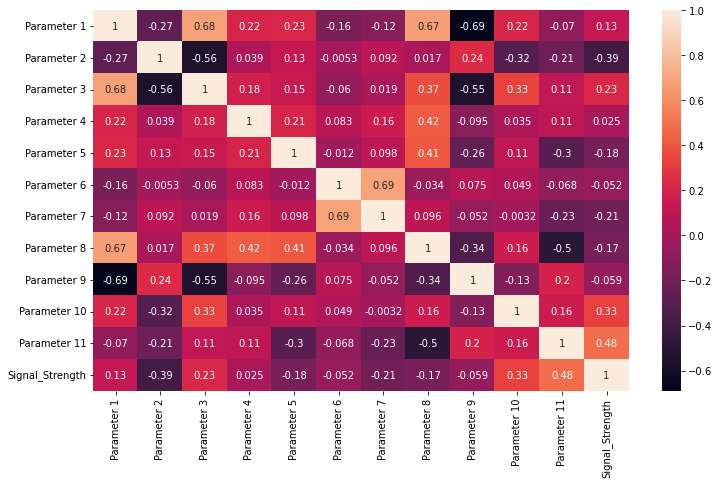

In [28]:
# studying correlation between the attributes
corr_1=data.corr()
plt.subplots(figsize =(12, 7)) 
sns.heatmap(corr_1,annot=True)

From the above heat map it is clearly evident that

1.high correlation coefficient value lies between ± 0.50 and ± 1.

2.The Parameter 1 is highly correlated with Parameter 3 and Parameter 8, Parameter 9.

3.The Parameter 6 and 7 are highly correlated.

Since, the correlation is not too high near 0.8 or above, dropping the features is not required.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


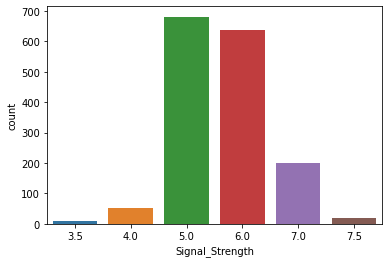

In [29]:
#visualization
#univariate
#count plot for signal strength
sns.countplot(data['Signal_Strength'])    # Distibution of the column 'Signal_Strength'
plt.show()

From the above plot, it is clearly evident that class 5.0 in 'Signal_Strength' has the highest count

(array([ 23.,  64., 225., 360., 323., 208., 143.,  97.,  60.,  96.]),
 array([ 4.6  ,  5.375,  6.15 ,  6.925,  7.7  ,  8.475,  9.25 , 10.025,
        10.8  , 11.575, 12.35 ]),
 <a list of 10 Patch objects>)

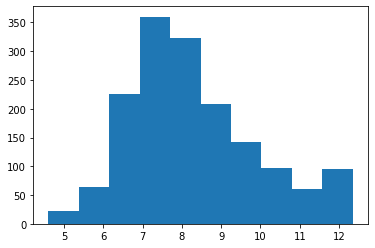

In [30]:
#histogram
#parameter 1
plt.hist(x=data['Parameter 1'])

The above histogram shows the distribution of the data points of the parameter 1



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


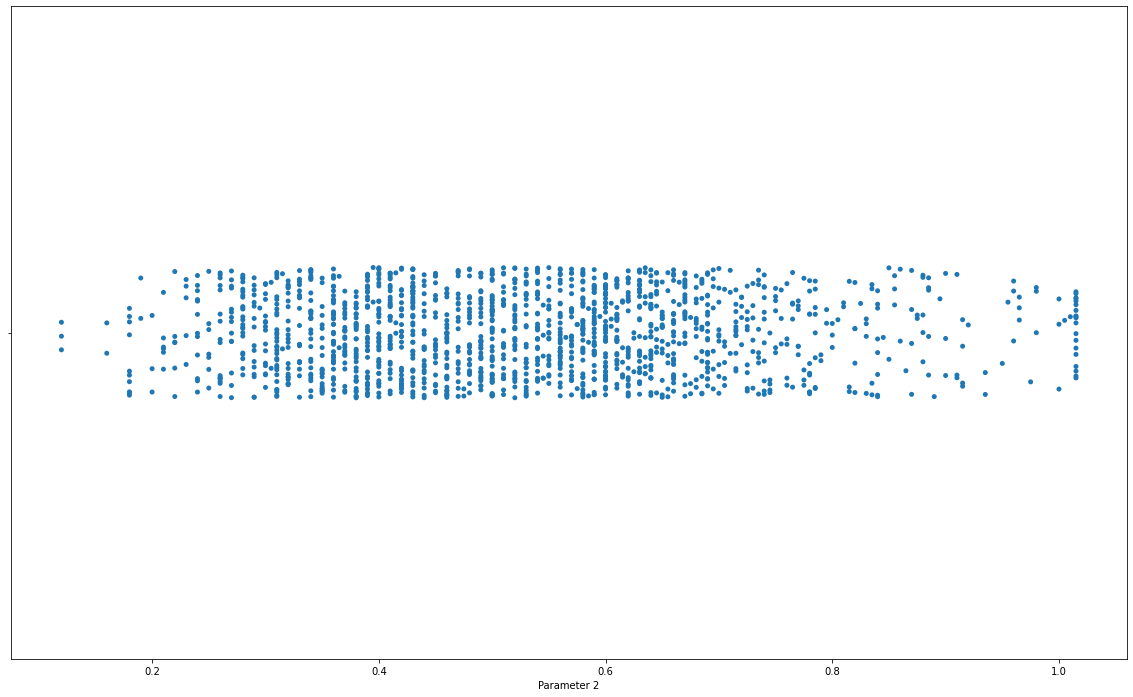

In [31]:
#stripplot
#graph for parameter 2 (univariate graph) and it depicts the distribution of the data points.
plt.figure(figsize=(20,12))
sns.stripplot(data['Parameter 2']) 

It depicts the distribution of the parameter 2 data points


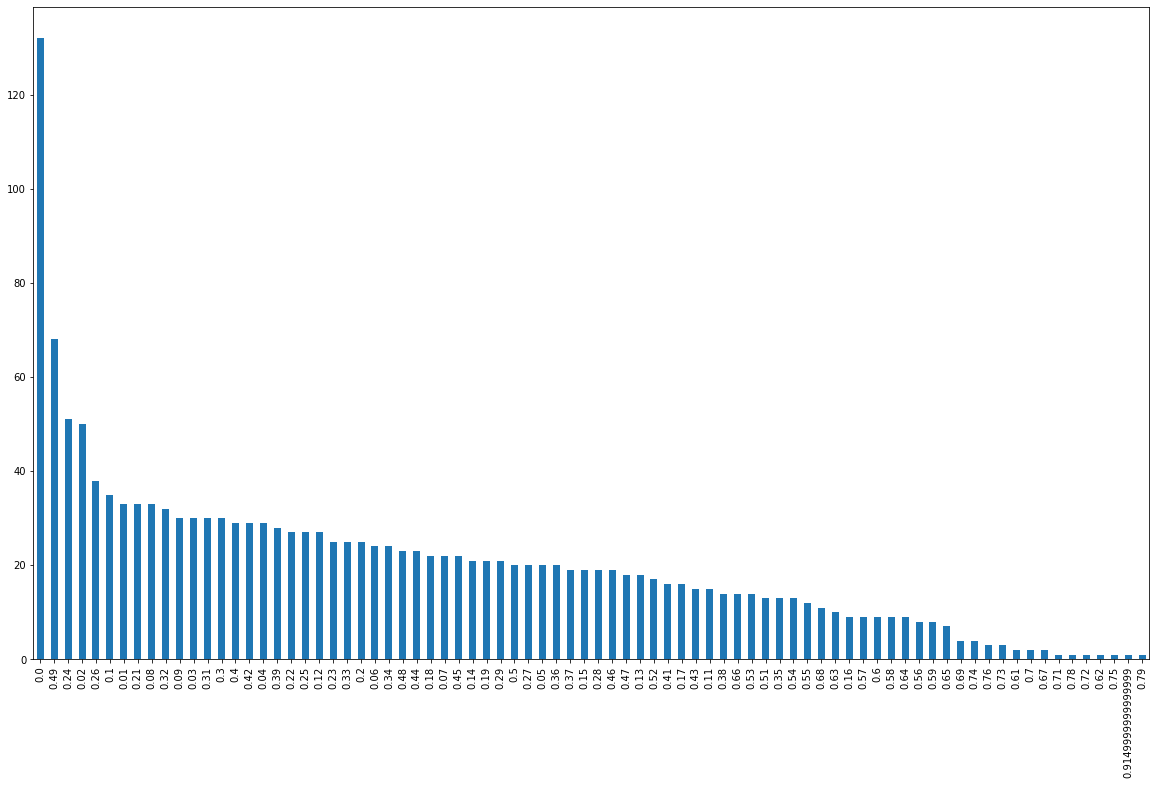

In [32]:
#parameter 3
#bar plot for parameter3
plt.figure(figsize=(20,12))
data['Parameter 3'].value_counts().plot.bar()

From the bar plot above, it can be depicted that the count of the parameter 2 '0.49' is about 70 and the count of the value '0.79' is the least.

The above bar plot shows the distribution of the data points.

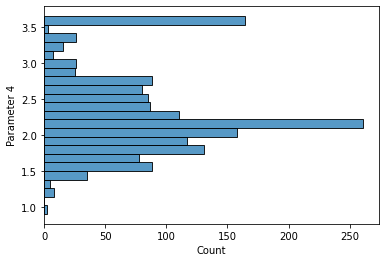

In [33]:
#Histogram
#Parameter 4
sns.histplot(data=data, y="Parameter 4")

From the above histogram, it can be depicted that the parameter 4 of value '2.0' is having a count of 170. The above histogram depicts the count of each value in the parameter 4 of the dataset.

The above plot displays the count of the data points of the attribute parameter 4. It depicts the distribution of the data points.

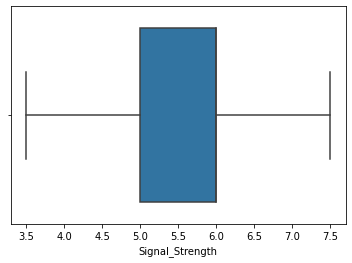

In [34]:
#graph for Signal strength
#boxplot
sns.boxplot(x=data["Signal_Strength"])

The above plot displays the maximum, minimum and median of the signal strength. From the above it can be depicted that the values of the signal strength lie between 3.5 and 7.5.

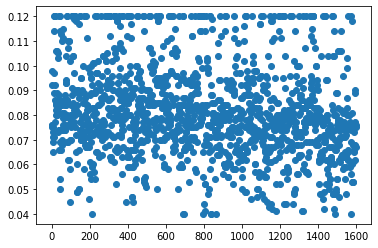

In [35]:
#parameter 5
#scatter plot
plt.scatter(data.index,data['Parameter 5'])
plt.show()

The above plot depicts the distribution of the data points of the parameter 5.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 27.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


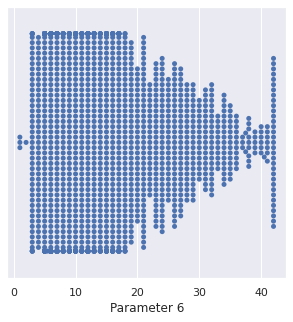

In [36]:
#parameter 6
#Swarm plot
sns.set(rc={'figure.figsize':(5,5)})
sns.swarmplot(x=data['Parameter 6'])

The above swarm-plot spreads out the data points of the variable automatically to avoid overlap and hence provides a better visual overview of the data.

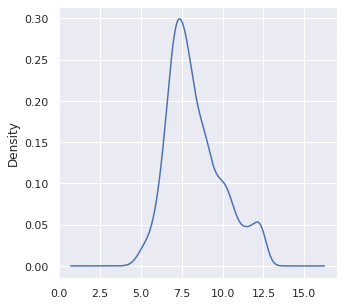

In [37]:
#parameter 1
#density plot
plt.figure(figsize=(5,5))
data['Parameter 1'].plot(kind='density')

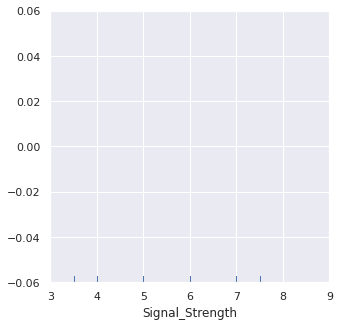

In [38]:
#Rug plot
#Signal_strength
fig, ax=plt.subplots()
sns.rugplot(data["Signal_Strength"])
ax.set_xlim(3,9)
plt.show()

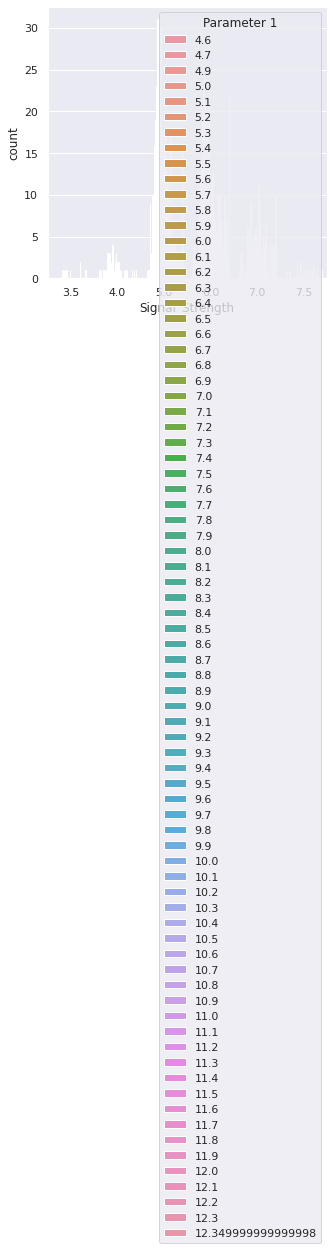

In [39]:
#bivariate plots
#parameter1 vs Signal_strength
#count plot
sns.countplot(x="Signal_Strength",hue="Parameter 1", data=data)


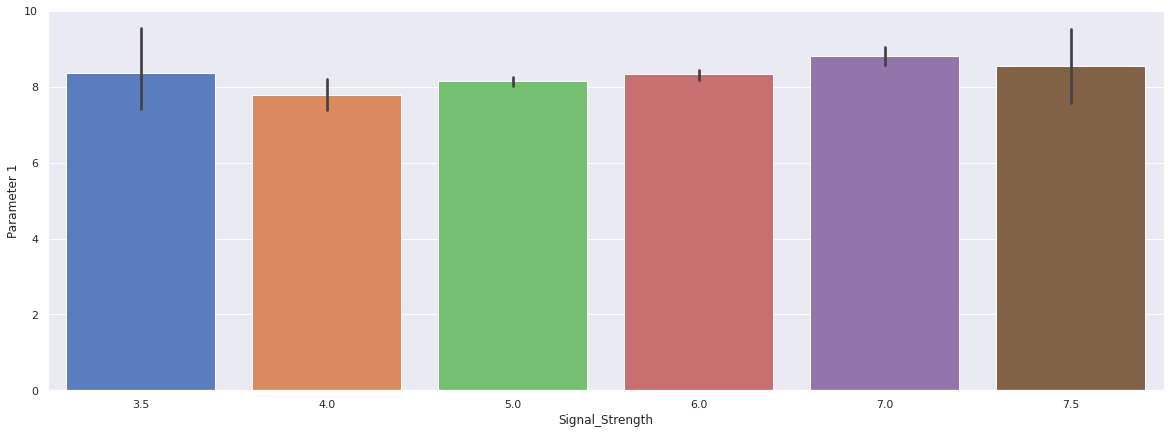

In [40]:
#bar plot
#signal_strength vs parameter1
plt.figure(figsize=(20,7)) 
ax = sns.barplot(x='Signal_Strength', y='Parameter 1', data=data, palette='muted')

The above bar plot displays the relation between the parameter 1 and signal_strength. The plot depicts that the signal_strength differs with the values of parameter 1. For instance, when the parameter 1 is 8 the signal strength is 3.5

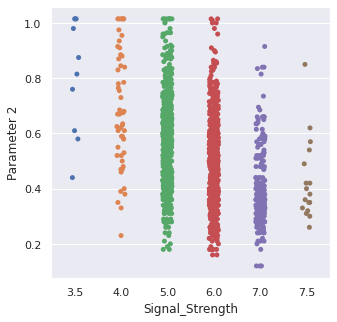

In [41]:
#strip plot
#Parameter 2 vs Signal_strength
sns.stripplot(x="Signal_Strength", y="Parameter 2", data=data)

From the above plot, it is clearly evident that the signal_strength varies with the parameter 2. For instance when the value of the parameter 2 is 1.0 the signal_strength is 3.5

<Figure size 10800x2160 with 0 Axes>

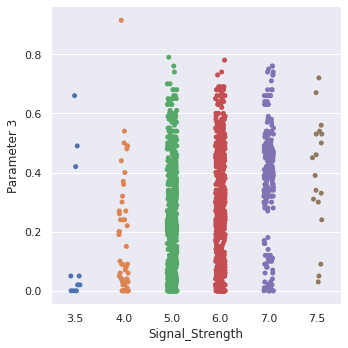

In [42]:
#catplot
#Parameter 3 vs Signal_strength
plt.figure(figsize=(150,30))
sns.catplot(x="Signal_Strength", y="Parameter 3", data=data)

<Figure size 3600x3600 with 0 Axes>

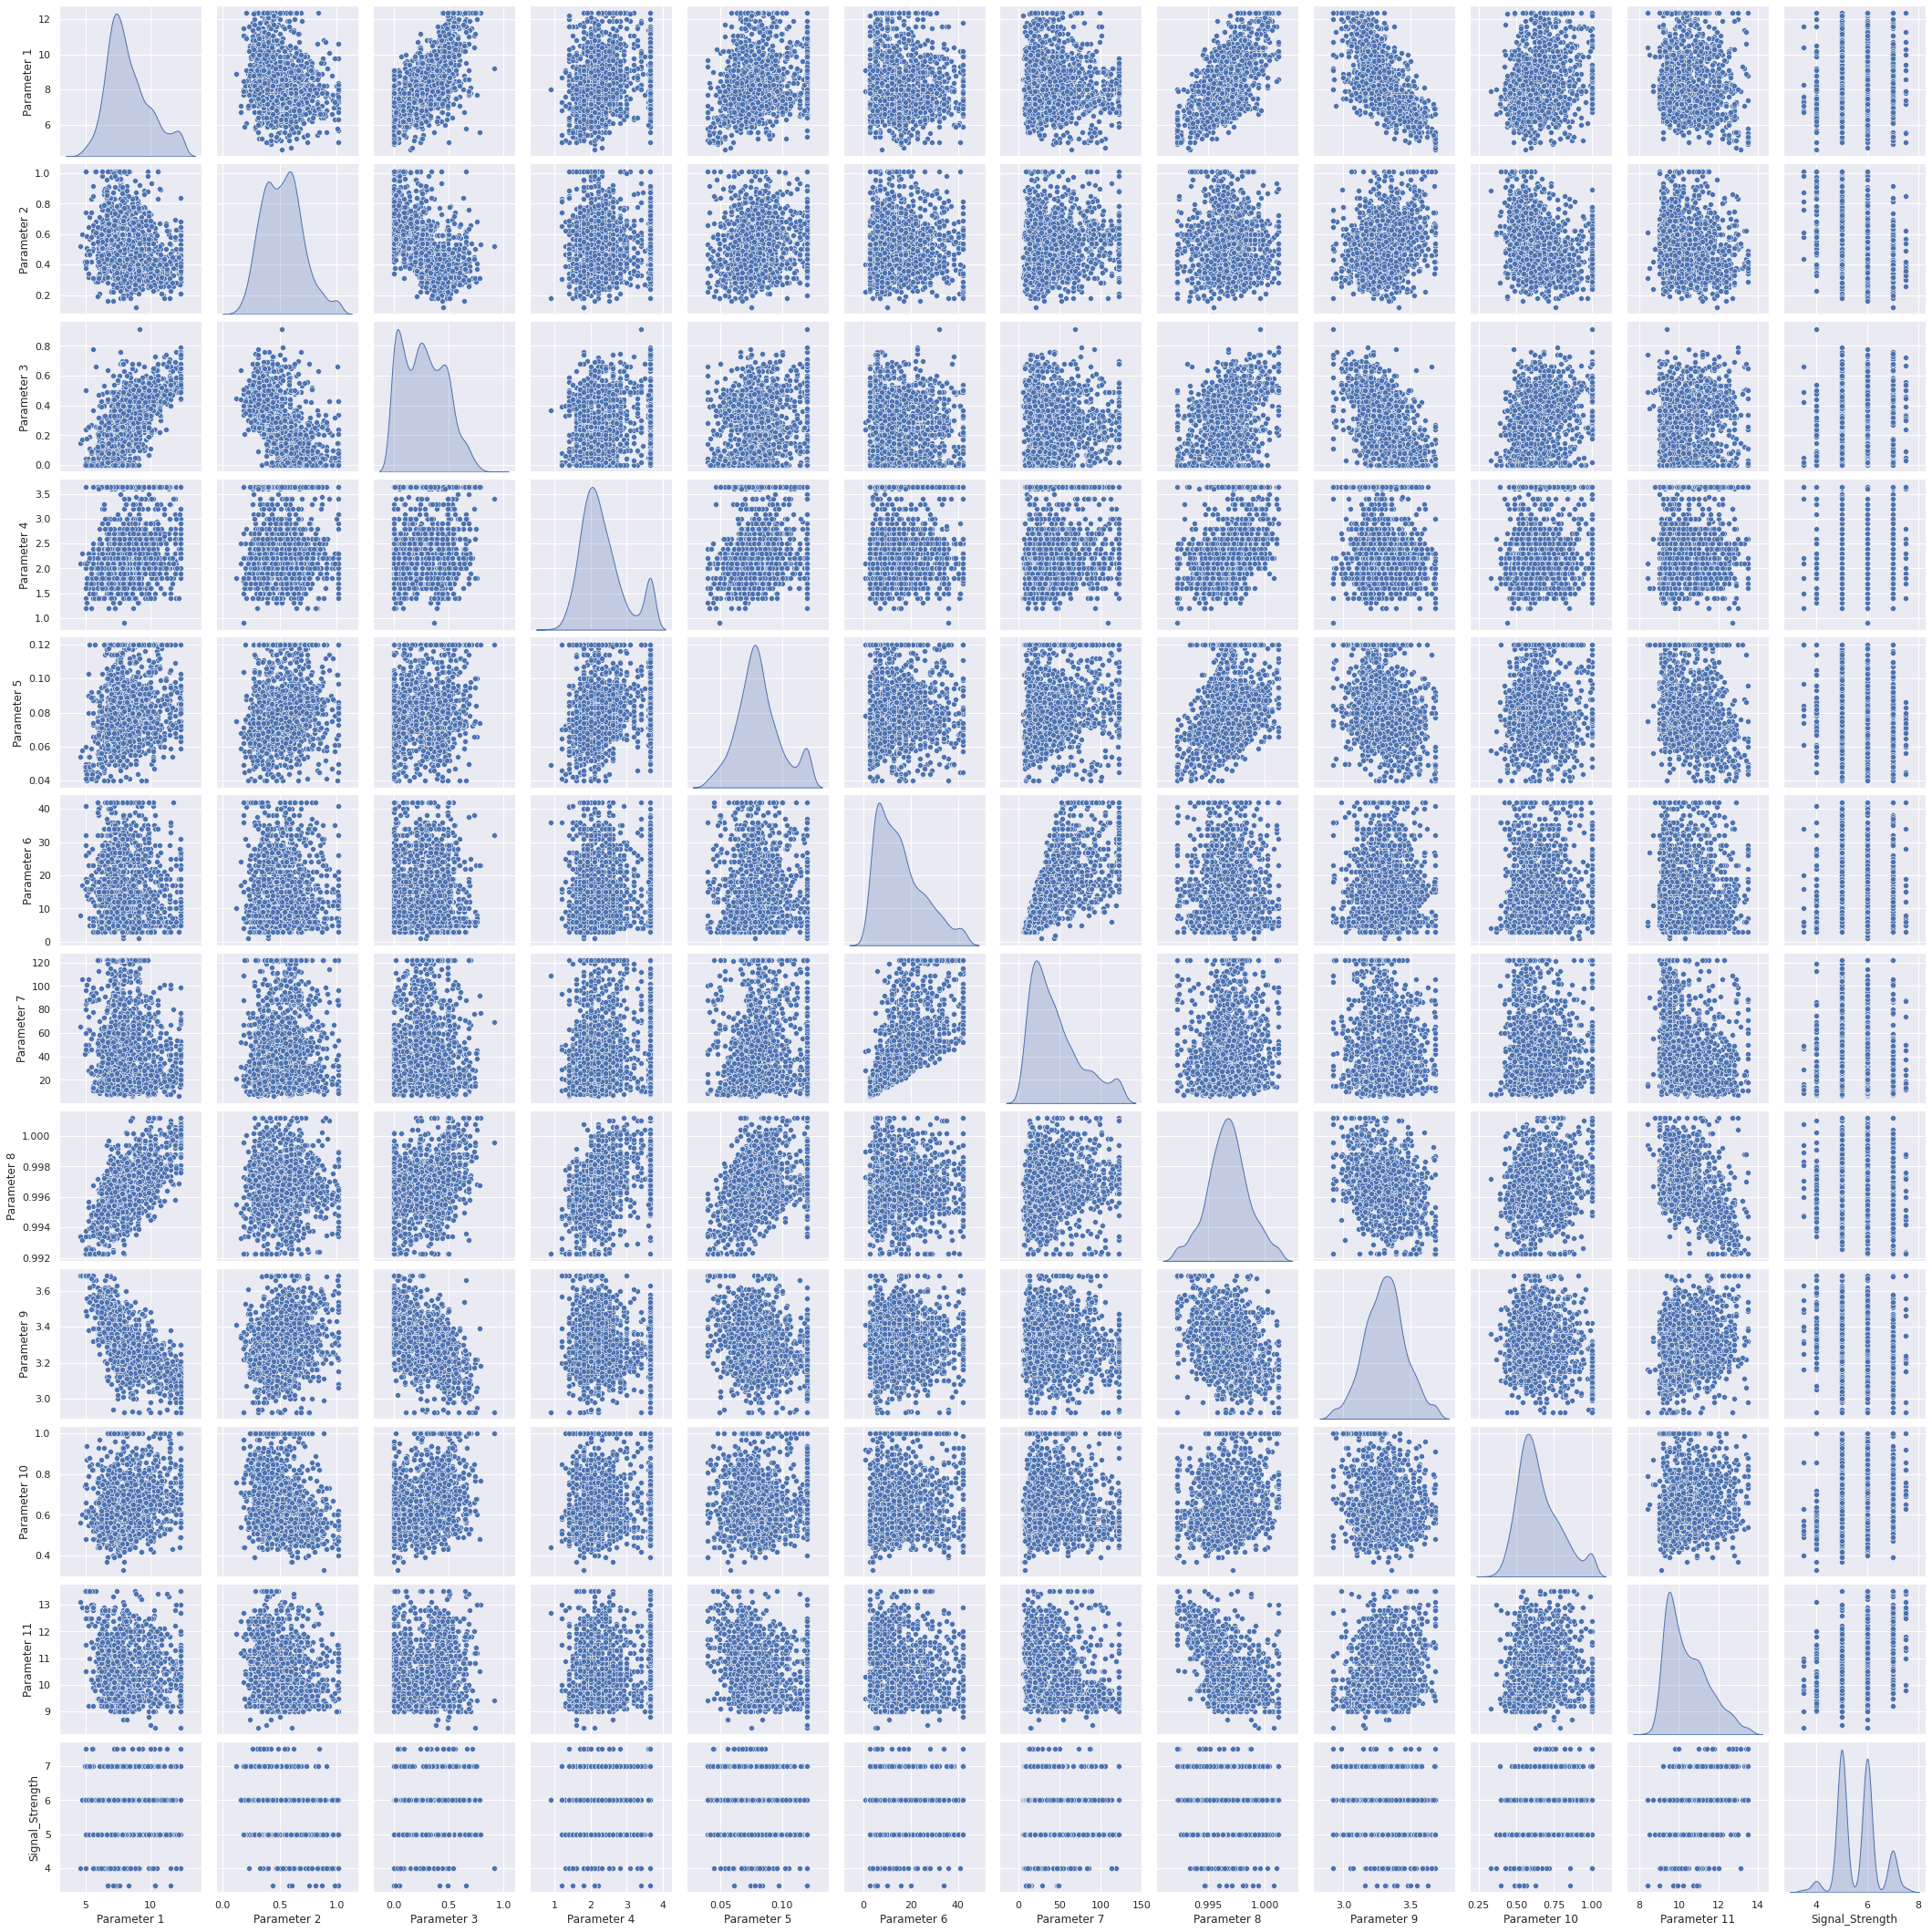

In [43]:
#multivariate plots
#pair plot
plt.figure(figsize = (50,50))
sns.pairplot(data,diag_kind='kde')
plt.show()

From the above pair plot it is clearly evident that

Parameter 6 and Parameter 7 are highly correlated with each other and vice versa.They have almost 0 correlation with other Parameters.

1.Parameter 1 is positively correlated to Parameter 3 and Parameter 8.

2.Parameter 1 is negatively correlated to Parameter 2 and Parameter 9.

3.Parameter 4 has very low correlation with other Parameters.

In [44]:
#3.Design, train, tune and test a neural network regressor.
# splitting the data into independent and dependent data.
X_data = data.iloc[:, :-1]
y_data = data.iloc[:, -1]

In [45]:
#shape of X_data and y_data
shape_X=X_data.shape
print("Shape of X_data:",shape_X)
shape_y=y_data.shape
print("Shape of y_data:",shape_y)

Shape of X_data: (1599, 11)
Shape of y_data: (1599,)


In [46]:
#head of X_data and y_data
X_data.head() # prints the first five rows of X_data

Parameter 1  Parameter 2  ...  Parameter 10  Parameter 11
0          7.4         0.70  ...          0.56           9.4
1          7.8         0.88  ...          0.68           9.8
2          7.8         0.76  ...          0.65           9.8
3         11.2         0.28  ...          0.58           9.8
4          7.4         0.70  ...          0.56           9.4

[5 rows x 11 columns]

In [47]:
y_data.head()

0    5.0
1    5.0
2    5.0
3    6.0
4    5.0
Name: Signal_Strength, dtype: float64

In [48]:
#splitting the training and test dataset
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.2, random_state = 7)

In [49]:
#normalizing the data
X_train = preprocessing.normalize(X_train)
X_test= preprocessing.normalize(X_test)

In [50]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [51]:
#printing the shape of X_train,X_test, y_train,y_test

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1279, 11)
(320, 11)
(1279,)
(320,)


In [52]:
#importing the libraries required for creating a neural network regressor model

import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [53]:
model_reg = tf.keras.models.Sequential()

# Normalize input data
model_reg.add(tf.keras.layers.BatchNormalization(input_shape=(11,)))

# Add final Dense layer for prediction - Tensorflow.keras declares weights and bias automatically
model_reg.add(tf.keras.layers.Dense(1))
# Compile the model - add mean squared error as loss and stochastic gradient descent as optimizer
model_reg.compile(optimizer='sgd', loss='mse')
model_reg.fit(X_train, y_train,epochs=100, batch_size=10)

Epoch 1/100
128/128 [==============================] - 1s 1ms/step - loss: 2.7204
Epoch 2/100
128/128 [==============================] - 0s 1ms/step - loss: 0.6418
Epoch 3/100
128/128 [==============================] - 0s 1ms/step - loss: 0.5801
Epoch 4/100
128/128 [==============================] - 0s 1ms/step - loss: 0.5687
Epoch 5/100
128/128 [==============================] - 0s 1ms/step - loss: 0.5510
Epoch 6/100
128/128 [==============================] - 0s 1ms/step - loss: 0.5360
Epoch 7/100
128/128 [==============================] - 0s 1ms/step - loss: 0.5443
Epoch 8/100
128/128 [==============================] - 0s 1ms/step - loss: 0.5252
Epoch 9/100
128/128 [==============================] - 0s 1ms/step - loss: 0.5141
Epoch 10/100
128/128 [==============================] - 0s 1ms/step - loss: 0.5224
Epoch 11/100
128/128 [==============================] - 0s 1ms/step - loss: 0.5068
Epoch 12/100
128/128 [==============================] - 0s 1ms/step - loss: 0.4955
Epoch 13/100


From the above, it can be determined that the model_reg is having a loss of 0.45

In [54]:
#creating an other model with changing the epoch size

model_reg_4 = tf.keras.models.Sequential()

# Normalize input data
model_reg_4.add(tf.keras.layers.BatchNormalization(input_shape=(11,)))

# Add final Dense layer for prediction - Tensorflow.keras declares weights and bias automatically
model_reg_4.add(tf.keras.layers.Dense(1))
# Compile the model - add mean squared error as loss and stochastic gradient descent as optimizer
model_reg_4.compile(optimizer='sgd', loss='mse')
model_reg_4.fit(X_train, y_train,epochs=700, batch_size=10)

Epoch 1/700
128/128 [==============================] - 1s 1ms/step - loss: 2.5246
Epoch 2/700
128/128 [==============================] - 0s 1ms/step - loss: 0.7569
Epoch 3/700
128/128 [==============================] - 0s 1ms/step - loss: 0.7062
Epoch 4/700
128/128 [==============================] - 0s 1ms/step - loss: 0.6537
Epoch 5/700
128/128 [==============================] - 0s 1ms/step - loss: 0.6284
Epoch 6/700
128/128 [==============================] - 0s 1ms/step - loss: 0.6102
Epoch 7/700
128/128 [==============================] - 0s 1ms/step - loss: 0.6035
Epoch 8/700
128/128 [==============================] - 0s 1ms/step - loss: 0.5999
Epoch 9/700
128/128 [==============================] - 0s 1ms/step - loss: 0.5764
Epoch 10/700
128/128 [==============================] - 0s 1ms/step - loss: 0.5704
Epoch 11/700
128/128 [==============================] - 0s 1ms/step - loss: 0.5626
Epoch 12/700
128/128 [==============================] - 0s 1ms/step - loss: 0.5784
Epoch 13/700


From the above, it can be determined that the loss of the model_reg_4 is 0.47

In [55]:
#printing the loss of modl_reg_4

results_7 = model_reg_4.evaluate(X_test, y_test)

10/10 [==============================] - 0s 2ms/step - loss: 0.3402


From above, it can be determined that the loss is 0.33

In [56]:
#printing the loss of model_reg
results_5 = model_reg.evaluate(X_test, y_test)

10/10 [==============================] - 0s 2ms/step - loss: 0.3614


From the above, it can be depicted that the loss of the model_reg is less than that of model_reg_4 i.e -0.3364

In [57]:
# Creating a model
model_1 = Sequential()
model_1.add(Dense(64, input_shape = (11,), activation = 'relu'))
model_1.add(BatchNormalization())
model_1.add(Dropout(0.5))
model_1.add(Dense(1, activation = 'linear'))


In [58]:
#compiling the model
sgd = optimizers.Adam(learning_rate = 0.001)
model_1.compile(optimizer = sgd, loss = 'mse', metrics=['mae'])

In [59]:
model_1.fit(X_train, np.array(y_train), batch_size = 10, epochs = 100, verbose = 1) #fitting the model

Epoch 1/100
128/128 [==============================] - 1s 2ms/step - loss: 24.6530 - mae: 4.8198
Epoch 2/100
128/128 [==============================] - 0s 2ms/step - loss: 7.3198 - mae: 2.3771
Epoch 3/100
128/128 [==============================] - 0s 2ms/step - loss: 1.7243 - mae: 1.0328
Epoch 4/100
128/128 [==============================] - 0s 2ms/step - loss: 1.3702 - mae: 0.9319
Epoch 5/100
128/128 [==============================] - 0s 2ms/step - loss: 1.3417 - mae: 0.9242
Epoch 6/100
128/128 [==============================] - 0s 2ms/step - loss: 1.1790 - mae: 0.8687
Epoch 7/100
128/128 [==============================] - 0s 2ms/step - loss: 1.2248 - mae: 0.8848
Epoch 8/100
128/128 [==============================] - 0s 2ms/step - loss: 1.1589 - mae: 0.8610
Epoch 9/100
128/128 [==============================] - 0s 2ms/step - loss: 1.1404 - mae: 0.8508
Epoch 10/100
128/128 [==============================] - 0s 2ms/step - loss: 1.0730 - mae: 0.8327
Epoch 11/100
128/128 [================

In [60]:
results_1 = model_1.evaluate(X_test, y_test)

10/10 [==============================] - 0s 2ms/step - loss: 0.3410 - mae: 0.4818


From the above, it can be determined that the model_1 is having the loss greater than that of the model_reg and model_reg_4

In [61]:
print(model_1.metrics_names)
print(results_1)    

['loss', 'mae']
[0.34098440408706665, 0.4817888140678406]


In [62]:
#tuning the model
def larger_model():
	# create model
	model_t = Sequential()
	model_t.add(Dense(11, input_dim=11, kernel_initializer='normal', activation='relu'))
	model_t.add(Dense(6, kernel_initializer='normal', activation='relu'))
	model_t.add(Dense(1, kernel_initializer='normal'))
	# Compile model
	model_t.compile(loss='mean_squared_error', optimizer='adam')
	return model_t
# evaluate model with standardized dataset
estimators_t = []
estimators_t.append(('standardize', StandardScaler()))
estimators_t.append(('mlp', KerasRegressor(build_fn=larger_model, epochs=50, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators_t)
kfold_t = KFold(n_splits=10)
results_t = cross_val_score(pipeline, X_data, y_data, cv=kfold_t)
print("Larger: %.2f (%.2f) MSE" % (results_t.mean(), results_t.std()))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  


Larger: -0.42 (0.05) MSE


In [63]:
model_2 = KerasRegressor(build_fn = larger_model,
                       verbose = 0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  


In [64]:
#gridsearchCv
#define the gridsearch parameters
batchsize=[10,20,40,60,80,100]
epochs=[10,30,50]

In [65]:
paramgrid= dict(batch_size=batchsize,epochs=epochs)

In [66]:
from sklearn.model_selection import GridSearchCV
mygrid=GridSearchCV(estimator=model_2,param_grid=paramgrid,n_jobs=-1,cv=3)
grid_result=mygrid.fit(X_data,y_data)

In [67]:
print("Best Score: ",
      grid_result.best_score_,
      "and Best Params: ",
      grid_result.best_params_)

Best Score:  -0.4268691837787628 and Best Params:  {'batch_size': 10, 'epochs': 50}


In [68]:
#RandomSearchCv
from sklearn.model_selection import RandomizedSearchCV
model_k = KerasRegressor(build_fn = larger_model,
                       verbose = 0)
# Define the hyperparameter space
params = {'batch_size': [16, 32, 64], 
          'epochs': [50, 100]}
# Create a randomize search cv object 
random_search = RandomizedSearchCV(model_k,
                                   param_distributions = params,
                                   cv = KFold(10))
random_search_results = random_search.fit(X_data,y_data)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


In [69]:
print("Best Score: ",
      random_search_results.best_score_,
      "and Best Params: ",
      random_search_results.best_params_)

Best Score:  -0.41479739248752595 and Best Params:  {'epochs': 100, 'batch_size': 16}


From the above normal neural network regressor and hyperparameter tuning techniques such as GridSearchCV, RandomSearchCV it is clearly evident that the model 'model_reg' is having the least loss and the predicted values are accurate to the actual values of the dataset.

In [70]:
#Testing the model_reg
y_pred7 = model_reg.predict(X_test)
print(y_pred7[0])
print(y_pred7[1])
print(y_pred7[2])
print(y_pred7[3])
print(y_pred7[4])
print(y_test)

[5.7933764]
[5.820245]
[6.3996887]
[5.566759]
[5.635997]
[6.  6.  6.  5.  6.  6.  6.  6.  6.  5.  7.  6.  6.  5.  5.  5.  6.  4.
 5.  6.  5.  5.  6.  6.  5.  5.  6.  6.  6.  6.  5.  5.  6.  5.  6.  5.
 7.  6.  7.  5.  5.  6.  7.  6.  5.  6.  6.  7.  6.  7.  6.  5.  6.  7.
 5.  6.  6.  6.  5.  7.  5.  7.  6.  6.  5.  5.  5.  6.  6.  6.  7.  6.
 6.  6.  5.  6.  6.  6.  5.  5.  5.  7.  5.  6.  6.  6.  5.  5.  7.  5.
 6.  6.  5.  5.  5.  6.  6.  5.  6.  5.  5.  6.  5.  6.  6.  6.  6.  6.
 6.  5.  6.  6.  6.  6.  5.  6.  6.  7.  6.  6.  5.  5.  6.  6.  6.  5.
 5.  7.  6.  6.  7.  5.  6.  5.  6.  6.  7.  6.  6.  5.  5.  6.  6.  5.
 6.  6.  5.  4.  5.  5.  5.  7.  6.  7.  6.  5.  5.  6.  5.  6.  5.  6.
 6.  7.  6.  5.  6.  5.  5.  5.  5.  5.  6.  7.  6.  6.  5.  5.  5.  6.
 6.  6.  6.  6.  5.  6.  6.  5.  6.  6.  5.  6.  5.  5.  5.  5.  4.  7.
 7.  6.  5.  6.  6.  6.  7.  7.5 6.  6.  7.  4.  6.  5.  5.  6.  6.  5.
 5.  5.  5.  6.  6.  6.  5.  6.  6.  7.  5.  6.  5.  6.  6.  5.  5.  6.
 6.  5.

In [71]:
y_pred8 = model_reg_4.predict(X_test)
print(y_pred8[0])
print(y_pred8[1])
print(y_pred8[2])
print(y_pred8[3])
print(y_pred8[4])
print(y_test)

[5.6569204]
[5.6445117]
[6.084394]
[5.3896236]
[5.560138]
[6.  6.  6.  5.  6.  6.  6.  6.  6.  5.  7.  6.  6.  5.  5.  5.  6.  4.
 5.  6.  5.  5.  6.  6.  5.  5.  6.  6.  6.  6.  5.  5.  6.  5.  6.  5.
 7.  6.  7.  5.  5.  6.  7.  6.  5.  6.  6.  7.  6.  7.  6.  5.  6.  7.
 5.  6.  6.  6.  5.  7.  5.  7.  6.  6.  5.  5.  5.  6.  6.  6.  7.  6.
 6.  6.  5.  6.  6.  6.  5.  5.  5.  7.  5.  6.  6.  6.  5.  5.  7.  5.
 6.  6.  5.  5.  5.  6.  6.  5.  6.  5.  5.  6.  5.  6.  6.  6.  6.  6.
 6.  5.  6.  6.  6.  6.  5.  6.  6.  7.  6.  6.  5.  5.  6.  6.  6.  5.
 5.  7.  6.  6.  7.  5.  6.  5.  6.  6.  7.  6.  6.  5.  5.  6.  6.  5.
 6.  6.  5.  4.  5.  5.  5.  7.  6.  7.  6.  5.  5.  6.  5.  6.  5.  6.
 6.  7.  6.  5.  6.  5.  5.  5.  5.  5.  6.  7.  6.  6.  5.  5.  5.  6.
 6.  6.  6.  6.  5.  6.  6.  5.  6.  6.  5.  6.  5.  5.  5.  5.  4.  7.
 7.  6.  5.  6.  6.  6.  7.  7.5 6.  6.  7.  4.  6.  5.  5.  6.  6.  5.
 5.  5.  5.  6.  6.  6.  5.  6.  6.  7.  5.  6.  5.  6.  6.  5.  5.  6.
 6.  5

In [72]:
y_pred = model_1.predict(X_test)

In [73]:
print(y_pred[0])
print(y_pred[1])
print(y_pred[2])
print(y_pred[3])
print(y_pred[4])

[5.629278]
[5.7664776]
[6.105545]
[5.3874984]
[5.558221]


In [74]:
print(y_test)

[6.  6.  6.  5.  6.  6.  6.  6.  6.  5.  7.  6.  6.  5.  5.  5.  6.  4.
 5.  6.  5.  5.  6.  6.  5.  5.  6.  6.  6.  6.  5.  5.  6.  5.  6.  5.
 7.  6.  7.  5.  5.  6.  7.  6.  5.  6.  6.  7.  6.  7.  6.  5.  6.  7.
 5.  6.  6.  6.  5.  7.  5.  7.  6.  6.  5.  5.  5.  6.  6.  6.  7.  6.
 6.  6.  5.  6.  6.  6.  5.  5.  5.  7.  5.  6.  6.  6.  5.  5.  7.  5.
 6.  6.  5.  5.  5.  6.  6.  5.  6.  5.  5.  6.  5.  6.  6.  6.  6.  6.
 6.  5.  6.  6.  6.  6.  5.  6.  6.  7.  6.  6.  5.  5.  6.  6.  6.  5.
 5.  7.  6.  6.  7.  5.  6.  5.  6.  6.  7.  6.  6.  5.  5.  6.  6.  5.
 6.  6.  5.  4.  5.  5.  5.  7.  6.  7.  6.  5.  5.  6.  5.  6.  5.  6.
 6.  7.  6.  5.  6.  5.  5.  5.  5.  5.  6.  7.  6.  6.  5.  5.  5.  6.
 6.  6.  6.  6.  5.  6.  6.  5.  6.  6.  5.  6.  5.  5.  5.  5.  4.  7.
 7.  6.  5.  6.  6.  6.  7.  7.5 6.  6.  7.  4.  6.  5.  5.  6.  6.  5.
 5.  5.  5.  6.  6.  6.  5.  6.  6.  7.  5.  6.  5.  6.  6.  5.  5.  6.
 6.  5.  6.  7.  6.  5.  5.  4.  5.  5.  6.  6.  6.  5.  5.  7.5

In [75]:
from sklearn.metrics import r2_score
score_r = r2_score(y_test,y_pred)
print(score_r)

0.38613211631986566


Hence the model_reg is the best model with the least loss of about 0.33 and in this model the predicted values are close to the actual values.

In [76]:
#4. pickle the model for future use
import pickle
Pkl_Filename = "Pickle_RR_Model.pkl"  
with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(model_reg, file)


INFO:tensorflow:Assets written to: ram://c180ba9f-3ca0-48e5-ad5a-bd40743fbad5/assets


In [77]:
#part 2

In [78]:
#1.import the data
import numpy as np
import h5py

In [79]:
with h5py.File('/content/drive/MyDrive/greatlearningdata/Part - 4 - Autonomous_Vehicles_SVHN_single_grey1.h5','r') as hdf:
  ls=list(hdf.keys())
  print("list of datasets:\n",ls)
  X_train_r5=hdf.get('X_train')
  X_test_r5=hdf.get('X_test')
  X_val_r5=hdf.get('X_val')
  y_val_r5=hdf.get('y_val')
  y_train_r5=hdf.get('y_train')
 


list of datasets:
 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']


In [80]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
import h5py
import numpy as np
h5f = drive.CreateFile({'id':'1wny1UsY97XmoIE4sfyMMDrwLPDedMPoB'}) # replace the id with id of file you want to access
h5f.GetContentFile('/content/drive/MyDrive/greatlearningdata/Part - 4 - Autonomous_Vehicles_SVHN_single_grey1.h5')
h5f =h5py.File('/content/drive/MyDrive/greatlearningdata/Part - 4 - Autonomous_Vehicles_SVHN_single_grey1.h5','r')

In [81]:
X_train_r = h5f['X_train'][:]
y_train_r1= h5f['y_train'][:]
X_test_r= h5f['X_test'][:]
y_test_r1= h5f['y_test'][:]

In [82]:
#2.Data preprocessing and visualization
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import Dense, Dropout, Activation, Flatten
# fix random seed for reproducability 
seed = 7
np.random.seed(seed)
X_train_r3= X_train_r.reshape(X_train_r.shape[0],1024)
X_test_r3 = X_test_r.reshape(X_test_r.shape[0],1024)

In [83]:
#normalize inputs from 0-255 to 0-1
X_train_r3= X_train_r3/255.0
X_test_r3 =X_test_r3/255.0
print('Training set',X_train_r3.shape,y_train_r1.shape)
print('Testset',X_test_r3.shape,y_test_r1.shape)

Training set (42000, 1024) (42000,)
Testset (18000, 1024) (18000,)


In [84]:
#shape of test data
print(X_test_r3.shape)
print(y_test_r1.shape)

(18000, 1024)
(18000,)


In [85]:
#one hot coding
y_train_r = np_utils.to_categorical(y_train_r1)
y_test_r=np_utils.to_categorical(y_test_r1)

In [86]:
#no of classes
no_classes= y_test_r.shape[1]
no_hidden=32
no_classes

10

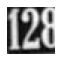

label for each of the image:[2 6 7 4 4 0 3 0 7 3]


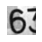

label for each of the image:[2 6 7 4 4 0 3 0 7 3]


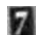

label for each of the image:[2 6 7 4 4 0 3 0 7 3]


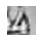

label for each of the image:[2 6 7 4 4 0 3 0 7 3]


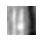

label for each of the image:[2 6 7 4 4 0 3 0 7 3]


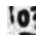

label for each of the image:[2 6 7 4 4 0 3 0 7 3]


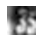

label for each of the image:[2 6 7 4 4 0 3 0 7 3]


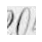

label for each of the image:[2 6 7 4 4 0 3 0 7 3]


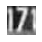

label for each of the image:[2 6 7 4 4 0 3 0 7 3]


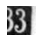

label for each of the image:[2 6 7 4 4 0 3 0 7 3]


In [87]:
#Visualization
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10,1))
for i in range(10):
  plt.subplot(1,10,i+1)
  plt.imshow(X_train_r[i], cmap="gray")
  plt.axis('off')
  plt.show()
  print('label for each of the image:%s'%(y_train_r1[0:10]))

In [88]:
#3. Design, train, tune and test the image classifier
#importing the required libraries and define model

import keras
from keras import losses
from keras import optimizers
from keras.layers import Dropout,MaxPooling2D
from keras.layers import BatchNormalization

In [112]:
#Training the model

In [89]:
# creating the model
def model():
  model_image= Sequential()
  model_image.add(BatchNormalization(input_shape=((1024,)))) 
  model_image.add(Dense(256,activation='relu'))
  model_image.add(Dense(64,activation='relu'))
  model_image.add(Dense(32,activation='relu'))
  model_image.add(Dense(no_classes,activation='softmax'))
  # compiling the model
  sgd_image= tf.optimizers.Adam(lr =1e-3)
  model_image.compile(loss=losses.categorical_crossentropy,optimizer=sgd_image,metrics=['accuracy'])
  return model_image
# Building the model
model_image = model()
# Fitting the model
history_image = model_image.fit(X_test_r3,y_test_r, validation_data=(X_test_r3,y_test_r),epochs=30,batch_size=200,verbose=2)
scores_i= model_image.evaluate(X_test_r3,y_test_r,verbose=0)
print("Error:%.2f%%" %(100-scores_i[1]*100))
model_image.summary()

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


90/90 - 2s - loss: 1.9310 - accuracy: 0.3338 - val_loss: 1.8706 - val_accuracy: 0.4802 - 2s/epoch - 26ms/step
Epoch 2/30
90/90 - 2s - loss: 1.1778 - accuracy: 0.6282 - val_loss: 1.2788 - val_accuracy: 0.6849 - 2s/epoch - 20ms/step
Epoch 3/30
90/90 - 3s - loss: 0.9765 - accuracy: 0.6932 - val_loss: 0.9858 - val_accuracy: 0.7361 - 3s/epoch - 29ms/step
Epoch 4/30
90/90 - 4s - loss: 0.8609 - accuracy: 0.7311 - val_loss: 0.8350 - val_accuracy: 0.7458 - 4s/epoch - 44ms/step
Epoch 5/30
90/90 - 2s - loss: 0.8031 - accuracy: 0.7449 - val_loss: 0.7690 - val_accuracy: 0.7617 - 2s/epoch - 23ms/step
Epoch 6/30
90/90 - 2s - loss: 0.7283 - accuracy: 0.7724 - val_loss: 0.6285 - val_accuracy: 0.8070 - 2s/epoch - 18ms/step
Epoch 7/30
90/90 - 2s - loss: 0.6775 - accuracy: 0.7838 - val_loss: 0.5807 - val_accuracy: 0.8198 - 2s/epoch - 18ms/step
Epoch 8/30
90/90 - 2s - loss: 0.6351 - accuracy: 0.7987 - val_loss: 0.5631 - val_accuracy: 0.8240 - 2s/epoch - 17ms/step
Epoch 9/30
90/90 - 2s - loss: 0.5895 - accu

From the above it can be determined that the accuracy of the model_image is about 94%.

In [111]:
#Tuning of the model

In [90]:
from sklearn.model_selection import RandomizedSearchCV
from keras.models import Sequential
from keras.layers import Dense
import warnings
warnings.filterwarnings('ignore')
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import KFold 


In [99]:
def train_and_test_loop1(iterations, lr, Lambda, verb=True):

    ## hyperparameters
    iterations = iterations
    learning_rate = lr
    hidden_nodes = 256
    output_nodes = 10

    model_c1 = Sequential()
    model_c1.add(Dense(hidden_nodes, input_shape=(1024,), activation='relu'))
    model_c1.add(Dense(hidden_nodes, activation='relu'))
    model_c1.add(Dense(64,activation='relu'))
    model_c1.add(Dense(32,activation='relu'))
    model_c1.add(Dense(output_nodes, activation='softmax', kernel_regularizer=regularizers.l2(Lambda)))
    
    sgd_c1 = tf.optimizers.SGD(lr=learning_rate, decay=1e-6, momentum=0.9)
    # Compile model
    model_c1.compile(loss='categorical_crossentropy', optimizer=sgd_c1, metrics=['accuracy'])
    
    # Fit the model
    model_c1.fit(X_train_r3, y_train_r, epochs=iterations, batch_size=1000, verbose= 1)
    score_c1 = model_c1.evaluate(X_train_r3, y_train_r, verbose=0)
    
    return score_c1

In [100]:
from tensorflow.keras import regularizers, optimizers
lr = 1e-7
Lambda = 1e-7
train_and_test_loop1(20, lr, Lambda)

Epoch 1/20
42/42 [==============================] - 2s 42ms/step - loss: 2.3323 - accuracy: 0.1042
Epoch 2/20
42/42 [==============================] - 2s 42ms/step - loss: 2.3323 - accuracy: 0.1042
Epoch 3/20
42/42 [==============================] - 2s 41ms/step - loss: 2.3323 - accuracy: 0.1042
Epoch 4/20
42/42 [==============================] - 2s 40ms/step - loss: 2.3323 - accuracy: 0.1042
Epoch 5/20
42/42 [==============================] - 2s 39ms/step - loss: 2.3323 - accuracy: 0.1042
Epoch 6/20
42/42 [==============================] - 2s 42ms/step - loss: 2.3323 - accuracy: 0.1042
Epoch 7/20
42/42 [==============================] - 2s 40ms/step - loss: 2.3323 - accuracy: 0.1042
Epoch 8/20
42/42 [==============================] - 2s 42ms/step - loss: 2.3323 - accuracy: 0.1042
Epoch 9/20
42/42 [==============================] - 2s 44ms/step - loss: 2.3323 - accuracy: 0.1041
Epoch 10/20
42/42 [==============================] - 2s 43ms/step - loss: 2.3323 - accuracy: 0.1041
Epoch 11/

[2.3321542739868164, 0.10414285957813263]

The accuracy is very low, hence consider other values of lr and lambda

In [101]:
lr = 0.001
Lambda = 0
train_and_test_loop1(500, lr, Lambda)

Epoch 1/500
42/42 [==============================] - 2s 42ms/step - loss: 2.3104 - accuracy: 0.1064
Epoch 2/500
42/42 [==============================] - 2s 41ms/step - loss: 2.3027 - accuracy: 0.1152
Epoch 3/500
42/42 [==============================] - 2s 39ms/step - loss: 2.3000 - accuracy: 0.1226
Epoch 4/500
42/42 [==============================] - 2s 40ms/step - loss: 2.2978 - accuracy: 0.1293
Epoch 5/500
42/42 [==============================] - 2s 40ms/step - loss: 2.2956 - accuracy: 0.1348
Epoch 6/500
42/42 [==============================] - 2s 42ms/step - loss: 2.2936 - accuracy: 0.1395
Epoch 7/500
42/42 [==============================] - 2s 42ms/step - loss: 2.2915 - accuracy: 0.1436
Epoch 8/500
42/42 [==============================] - 2s 41ms/step - loss: 2.2895 - accuracy: 0.1510
Epoch 9/500
42/42 [==============================] - 2s 39ms/step - loss: 2.2875 - accuracy: 0.1567
Epoch 10/500
42/42 [==============================] - 2s 40ms/step - loss: 2.2854 - accuracy: 0.1622

[0.4301204979419708, 0.8706904649734497]

Lets try to train now with a value of learning rate between 1e-7 and 1e8


In [102]:
lr = 1e4
Lambda = 1e-7
train_and_test_loop1(20, lr, Lambda)

Epoch 1/20
42/42 [==============================] - 2s 39ms/step - loss: nan - accuracy: 0.0997
Epoch 2/20
42/42 [==============================] - 2s 40ms/step - loss: nan - accuracy: 0.0997
Epoch 3/20
42/42 [==============================] - 2s 40ms/step - loss: nan - accuracy: 0.0997
Epoch 4/20
42/42 [==============================] - 2s 39ms/step - loss: nan - accuracy: 0.0997
Epoch 5/20
42/42 [==============================] - 2s 40ms/step - loss: nan - accuracy: 0.0997
Epoch 6/20
42/42 [==============================] - 2s 40ms/step - loss: nan - accuracy: 0.0997
Epoch 7/20
42/42 [==============================] - 2s 39ms/step - loss: nan - accuracy: 0.0997
Epoch 8/20
42/42 [==============================] - 2s 41ms/step - loss: nan - accuracy: 0.0997
Epoch 9/20
42/42 [==============================] - 2s 39ms/step - loss: nan - accuracy: 0.0997
Epoch 10/20
42/42 [==============================] - 2s 39ms/step - loss: nan - accuracy: 0.0997
Epoch 11/20
42/42 [====================

[nan, 0.09966666996479034]

Still too high learning rate. Loss is not decreasing. The rough range of learning rate we should be cross validating is somewhere between [1e3 to 1e-7]

In [103]:
import math
for k in range(1,10):
    lr = math.pow(10, np.random.uniform(-7.0, 3.0))
    Lambda = math.pow(10, np.random.uniform(-7,-2))
    best_accuracy = train_and_test_loop1(100, lr, Lambda, False)
    print("Try {0}/{1}: Best_val_acc: {2}, lr: {3}, Lambda: {4}\n".format(k, 100, best_accuracy, lr, Lambda))

Epoch 1/100
42/42 [==============================] - 2s 41ms/step - loss: 2.3071 - accuracy: 0.1060
Epoch 2/100
42/42 [==============================] - 2s 45ms/step - loss: 2.2923 - accuracy: 0.1373
Epoch 3/100
42/42 [==============================] - 2s 40ms/step - loss: 2.2795 - accuracy: 0.1779
Epoch 4/100
42/42 [==============================] - 2s 40ms/step - loss: 2.2594 - accuracy: 0.2185
Epoch 5/100
42/42 [==============================] - 2s 40ms/step - loss: 2.2183 - accuracy: 0.2665
Epoch 6/100
42/42 [==============================] - 2s 41ms/step - loss: 2.1397 - accuracy: 0.3027
Epoch 7/100
42/42 [==============================] - 2s 41ms/step - loss: 2.0041 - accuracy: 0.3336
Epoch 8/100
42/42 [==============================] - 2s 40ms/step - loss: 1.8362 - accuracy: 0.3848
Epoch 9/100
42/42 [==============================] - 2s 41ms/step - loss: 1.7093 - accuracy: 0.4187
Epoch 10/100
42/42 [==============================] - 2s 41ms/step - loss: 1.6022 - accuracy: 0.4643

From the above the highest accuracy is about 87% and loss is about 0.4 and the highest accuracy is acquired by the model_image with a loss of 0.4 and 94% accuracy.

In [104]:
#testing the model
Y_pred_i= model_image.predict(X_test_r3)
print(np.argmax(Y_pred_i[1]))
print(np.argmax(y_test_r[1]))
print(history_image.history.keys())

7
7
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [105]:
#4.Plot  the  training  loss,  validation  loss  vs  number  of  epochs  and  training  accuracy,  validation  accuracy  vs  number  of  epochs  plot  and  write  your observations on the same

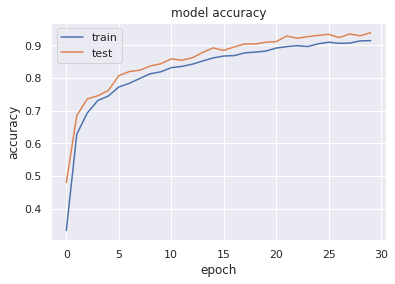

In [107]:
#summarize history for accuracy
plt.plot(history_image.history['accuracy'])
plt.plot(history_image.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()


From the above plot, it is clearly evident that
1. The accuracy of the testing and training data are nearly close
2. As, the number of epochs are increasing the predicted values are becoming closer to the actual values.
3. The highest accuracy of the both training and testing are nearly equal to about 94% for 30 epochs.
4. As, the number of the epochs are decreased both training and testing accuracy is low. For instance, the accuracy of the training data for number of epochs 0 is 40% and the the accuracy of the testing data is about 47%.



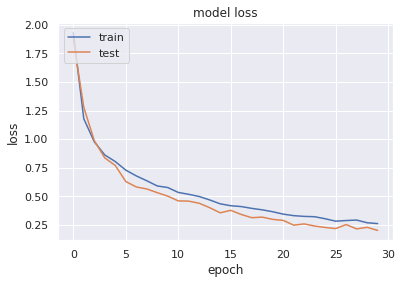

In [109]:
# summarize history for loss
plt.plot(history_image.history['loss'])
plt.plot(history_image.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

From the above plot, it can be determined that 
1. The loss of the training and testing is highest when the number of epochs is the least. For instance, when the number of epochs is 0 the loss of training and testing data is 1.7.
2. The loss of the training and testing data is the least when the number of epochs is the highest. For instance, when the number of epochs is about 30, the loss of training and testing data is about 0.4.
